In [ ]:
import numpy as np
import tensorflow as tf
import keras
from keras.preprocessing.image import ImageDataGenerator



**Load dataset,preprocess images**

In [ ]:
import os

from google.colab import drive
drive.mount('/content/drive')

datadir = '/content/drive/MyDrive/Data/8dataset'
trainingset = datadir+'/train/'
testset = datadir + '/test/'

batch_size = 32
train_datagen = ImageDataGenerator(
    rescale = 1. / 255,\
    zoom_range=0.1,\
    rotation_range=10,\
    width_shift_range=0.1,\
    height_shift_range=0.1,\
    horizontal_flip=True,\
    vertical_flip=False)

train_generator = train_datagen.flow_from_directory(
    directory=trainingset,
    target_size=(250, 250),
    color_mode="rgb",
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=True)

test_datagen = ImageDataGenerator(
    rescale = 1. / 255)

test_generator = test_datagen.flow_from_directory(
    directory=testset,
    target_size=(250, 250),
    color_mode="rgb",
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=False
)

num_samples = train_generator.n
num_classes = train_generator.num_classes
input_shape = train_generator.image_shape

classnames = [k for k,v in train_generator.class_indices.items()]

print("Image input %s" %str(input_shape))
print("Classes: %r" %classnames)

print('Loaded %d training samples from %d classes.' %(num_samples,num_classes))
print('Loaded %d test samples from %d classes.' %(test_generator.n,test_generator.num_classes))


Mounted at /content/drive
Found 6839 images belonging to 8 classes.
Found 1855 images belonging to 8 classes.
Image input (250, 250, 3)
Classes: ['Cloths_Wipes', 'Potato_Chips_bag', 'Raspberries', 'Seltzer_Water', 'fruit_plate', 'glass_food_container', 'rice_sides', 'steak_knives']
Loaded 6839 training samples from 8 classes.
Loaded 1855 test samples from 8 classes.


**Import Libraries**

In [ ]:
import tensorflow as tf
import keras
from keras.layers import Dense,Activation,Dropout,Flatten,Conv2D,MaxPooling2D,AveragePooling2D
from keras.layers.normalization import BatchNormalization
from keras import regularizers
from keras import optimizers
from keras import Sequential
from keras.optimizers import Adam
from keras.models import Sequential





print('libraries imported by Alkid')

libraries imported by Alkid


**Definition of the Convolutional Neural Network**

In [ ]:

def Neural_Network(input_shape,learning_rate):

    model = Sequential()

    # C1 Convolutional Layer  //////////////////
    model.add(Conv2D(filters=32, input_shape=input_shape, kernel_size=(7,7),strides=(2,2),padding='valid'))
    model.add(Activation('relu'))
    # Pooling
    model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2),padding='valid'))
    # Batch Normalisation 
    model.add(BatchNormalization())

    # C2 Convolutional Layer  /////////////////
    model.add(Conv2D(filters=64,kernel_size=(4,4),strides=(1,1),padding='valid'))
    model.add(Activation('relu'))
    # Pooling
    model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2),padding='valid'))
    # Batch Normalisation
    model.add(BatchNormalization())

    # C3 Convolutional Layer //////////////////
    model.add(Conv2D(filters=128,kernel_size=(4,4),strides=(1,1),padding='valid'))
    model.add(Activation('relu'))
    # Pooling
    model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2),padding='valid'))
    # Batch Normalisation
    model.add(BatchNormalization())

    # C4 Convolutional Layer  //////////////
    model.add(Conv2D(filters=256,kernel_size=(3,3),strides=(1,1),padding='valid'))
    model.add(Activation('relu'))
    # Pooling
    model.add(MaxPooling2D(pool_size=(2,2), strides=(1,1),padding='valid'))
    # Batch Normalisation
    model.add(BatchNormalization())

    # C5 Convolutional Layer  /////////////
    model.add(Conv2D(filters=128,kernel_size=(3,3),strides=(1,1)))
    model.add(Activation('relu'))
    # Pooling
    model.add(MaxPooling2D(pool_size=(2,2), strides=(1,1),))
    # Batch Normalisation
    model.add(BatchNormalization())

    # Flatten
    model.add(Flatten())

    flatten_shape = (input_shape[0]*input_shape[1]*input_shape[2],)
    
    # D1 Dense Layer
    model.add(Dense(512,input_shape=flatten_shape))
    model.add(Activation('relu'))
    # Dropout
    model.add(Dropout(0.2))
    

    # D2 Dense Layer
    model.add(Dense(256))
    model.add(Activation('relu'))
    # Dropout
    model.add(Dropout(0.2))
    
    # D3 Dense Layer
    model.add(Dense(128))
    model.add(Activation('relu'))
    # Dropout
    model.add(Dropout(0.2))
    model.add(BatchNormalization())

    # Output Layer
    model.add(Dense(8))
    model.add(Activation('softmax'))

    # Compile
    
    adam = optimizers.Adam(learning_rate=learning_rate,)
    model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

    return model

model = Neural_Network(input_shape,learning_rate=0.00001) 
model.summary()
print('excecuted by ALKID')


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 122, 122, 32)      4736      
_________________________________________________________________
activation_9 (Activation)    (None, 122, 122, 32)      0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 61, 61, 32)        0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 61, 61, 32)        128       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 58, 58, 64)        32832     
_________________________________________________________________
activation_10 (Activation)   (None, 58, 58, 64)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 29, 29, 64)       

**Training of the model for 100 epochs**

In [ ]:
steps_per_epoch=train_generator.n//train_generator.batch_size
val_steps=test_generator.n//test_generator.batch_size+1
epochs = 100
try:
    history = model.fit(train_generator, epochs=epochs, verbose=1,\
                    steps_per_epoch=steps_per_epoch,\
                    validation_data=test_generator,\
                    validation_steps=val_steps)
except KeyboardInterrupt:
    pass

Epoch 1/100
213/213 [==============================] - 2391s 11s/step - loss: 2.5088 - accuracy: 0.1708 - val_loss: 2.1557 - val_accuracy: 0.1337
Epoch 2/100
213/213 [==============================] - 96s 452ms/step - loss: 2.2294 - accuracy: 0.2496 - val_loss: 1.8572 - val_accuracy: 0.2927
Epoch 3/100
213/213 [==============================] - 96s 451ms/step - loss: 2.0664 - accuracy: 0.2941 - val_loss: 1.5263 - val_accuracy: 0.4437
Epoch 4/100
213/213 [==============================] - 96s 452ms/step - loss: 2.0296 - accuracy: 0.3150 - val_loss: 1.4861 - val_accuracy: 0.4685
Epoch 5/100
213/213 [==============================] - 97s 454ms/step - loss: 1.9498 - accuracy: 0.3254 - val_loss: 1.4657 - val_accuracy: 0.4760
Epoch 6/100
213/213 [==============================] - 96s 453ms/step - loss: 1.9360 - accuracy: 0.3274 - val_loss: 1.4246 - val_accuracy: 0.4938
Epoch 7/100
213/213 [==============================] - 96s 452ms/step - loss: 1.8761 - accuracy: 0.3474 - val_loss: 1.4237 -

**Evaluate the model**

In [ ]:
test_generator = test_datagen.flow_from_directory(
    directory=testset,
    target_size=(250, 250),
    color_mode="rgb",
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=False
)
val_steps=test_generator.n//test_generator.batch_size+1
loss, acc = model.evaluate(test_generator,verbose=1,steps=val_steps)
print('Test loss: %f' %loss)
print('Test accuracy: %f' %acc)



Found 1855 images belonging to 8 classes.
58/58 [==============================] - 5s 87ms/step - loss: 0.8874 - accuracy: 0.7003
Test loss: 0.887357
Test accuracy: 0.700270


**Precision, recall, F-score**

In [ ]:

import sklearn.metrics 
from sklearn.metrics import classification_report, confusion_matrix

val_steps=test_generator.n//test_generator.batch_size+1

test_generator = test_datagen.flow_from_directory(
    directory=testset,
    target_size=(250, 250),
    color_mode="rgb",
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=False
)

preds = model.predict(test_generator,verbose=1,steps=val_steps)

Ypred = np.argmax(preds, axis=1)
Ytest = test_generator.classes  # shuffle=False in test_generator

print(classification_report(Ytest, Ypred, labels=None, target_names=classnames, digits=3))


  

Found 1855 images belonging to 8 classes.
58/58 [==============================] - 5s 84ms/step
                      precision    recall  f1-score   support

        Cloths_Wipes      0.636     0.447     0.525       266
    Potato_Chips_bag      0.569     0.749     0.647       203
         Raspberries      0.917     0.794     0.851       238
       Seltzer_Water      0.630     0.705     0.665       210
         fruit_plate      0.524     0.667     0.587       273
glass_food_container      0.738     0.749     0.743       203
          rice_sides      0.822     0.794     0.808       238
        steak_knives      0.949     0.750     0.838       224

            accuracy                          0.700      1855
           macro avg      0.723     0.707     0.708      1855
        weighted avg      0.721     0.700     0.703      1855



**Confusion matrix analysis**

In [ ]:
import sklearn.metrics 
from sklearn.metrics import classification_report, confusion_matrix

val_steps=test_generator.n//test_generator.batch_size+1

test_generator = test_datagen.flow_from_directory(
    directory=testset,
    target_size=(250, 250),
    color_mode="rgb",
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=False
)

preds = model.predict_generator(test_generator,verbose=1,steps=val_steps)

Ypred = np.argmax(preds, axis=1)
Ytest = test_generator.classes  # shuffle=False in test_generator

cm = confusion_matrix(Ytest, Ypred)

conf = [] # data structure for confusions: list of (i,j,cm[i][j])
for i in range(0,cm.shape[0]):
  for j in range(0,cm.shape[1]):
    if (i!=j and cm[i][j]>0):
      conf.append([i,j,cm[i][j]])

col=2
conf = np.array(conf)
conf = conf[np.argsort(-conf[:,col])]  # decreasing order by 3-rd column (i.e., cm[i][j])

print('%-16s     %-16s  \t%s \t%s ' %('True','Predicted','errors','err %'))
print('------------------------------------------------------------------')
for k in conf:
  print('%-16s ->  %-16s  \t%d \t%.2f %% ' %(classnames[k[0]],classnames[k[1]],k[2],k[2]*100.0/test_generator.n))
  

Found 1855 images belonging to 8 classes.
 1/58 [..............................] - ETA: 6s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


58/58 [==============================] - 5s 82ms/step
True                 Predicted         	errors 	err % 
------------------------------------------------------------------
Cloths_Wipes     ->  fruit_plate       	58 	3.13 % 
Cloths_Wipes     ->  Seltzer_Water     	31 	1.67 % 
steak_knives     ->  fruit_plate       	31 	1.67 % 
Cloths_Wipes     ->  Potato_Chips_bag  	29 	1.56 % 
Raspberries      ->  fruit_plate       	25 	1.35 % 
rice_sides       ->  Potato_Chips_bag  	23 	1.24 % 
fruit_plate      ->  glass_food_container  	23 	1.24 % 
fruit_plate      ->  Cloths_Wipes      	22 	1.19 % 
Seltzer_Water    ->  Potato_Chips_bag  	21 	1.13 % 
glass_food_container ->  fruit_plate       	20 	1.08 % 
fruit_plate      ->  Potato_Chips_bag  	19 	1.02 % 
Seltzer_Water    ->  Cloths_Wipes      	18 	0.97 % 
Cloths_Wipes     ->  rice_sides        	15 	0.81 % 
fruit_plate      ->  Seltzer_Water     	15 	0.81 % 
Potato_Chips_bag ->  Seltzer_Water     	14 	0.75 % 
rice_sides       ->  fruit_plate    

**Plot results**

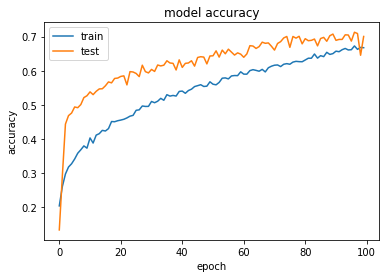

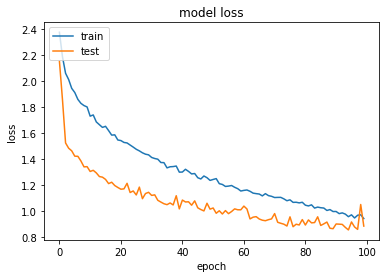

In [ ]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Plot confusion matrix

In [ ]:
from sklearn.metrics import plot_confusion_matrix
cm = confusion_matrix(Ytest, Ypred, labels=None, sample_weight=None)
print(cm)



[[119  29   4  31  58   9  15   1]
 [  9 152   2  14   9   5  11   1]
 [  7  10 189   3  25   0   3   1]
 [ 18  21   2 148  10   4   5   2]
 [ 22  19   6  15 182  23   5   1]
 [  7   9   0  10  20 152   2   3]
 [  4  23   2   5  12   3 189   0]
 [  1   4   1   9  31  10   0 168]]


NameError: ignored